# 6-1 : 난수로 평균, 표본표준편차 계산

In [1]:
import random
import math
import statistics

In [2]:
def mean_stdev(seq):
  """표본평균, 표본표준편차 계산"""

  n = len(seq)
  my_mean = sum(seq) / n
  deviation = [(element - my_mean)**2 for element in seq]
  my_stdev = math.sqrt(sum(deviation) / (n - 1))

  statistics_mean = statistics.mean(seq)
  statistics_stdev = statistics.stdev(seq)

  result = dict(my_mean = my_mean,
                my_stdev = my_stdev,
                statistics_mean = statistics_mean,
                statistics_stdev = statistics_stdev)
  
  return result

In [3]:
random.seed(20152410)
random_sequence = [random.randint(1, 10) for i in range(20)]
mean_stdev(random_sequence)

{'my_mean': 5.9,
 'my_stdev': 3.4320471104606147,
 'statistics_mean': 5.9,
 'statistics_stdev': 3.4320471104606143}

# 6-2 : 함수, 그래프

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [5]:
x_space = np.linspace(-15, 15, 300)

function_f = lambda x : (x + 1) * x * (x - 1) * (x - 2)
fx_space = function_f(x_space)

function_g = lambda x : (x + 2) * (x + 1) * x * (x - 1)
gx_space = function_g(x_space)

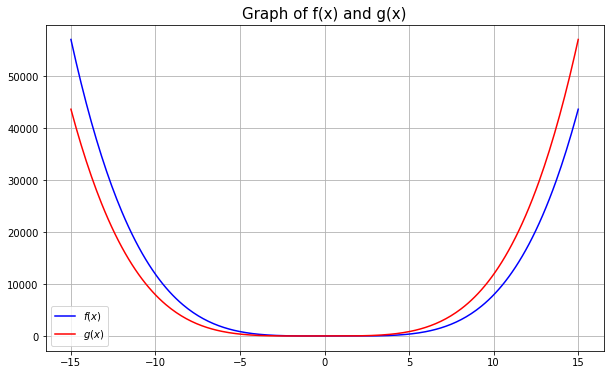

In [6]:
plt.figure(figsize = (10, 6))

plt.plot(x_space, fx_space, "b-", label = "$f(x)$")
plt.plot(x_space, gx_space, "r-", label = "$g(x)$")

plt.title("Graph of f(x) and g(x)", fontsize = 15)
plt.legend()

plt.grid()
plt.show()

# 6-3 : $f(x_0, x_1)$ 출력

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import itertools

In [8]:
x_6_3_0 = np.linspace(-10, 10, 300)
x_6_3_1 = np.linspace(-10, 10, 300)

x0_grid, x1_grid = np.meshgrid(x_6_3_0, x_6_3_1)

value_6_3 = (2 * (x0_grid ** 2) + x1_grid ** 2) * np.sin(2 * (x0_grid ** 2) + x1_grid ** 2)

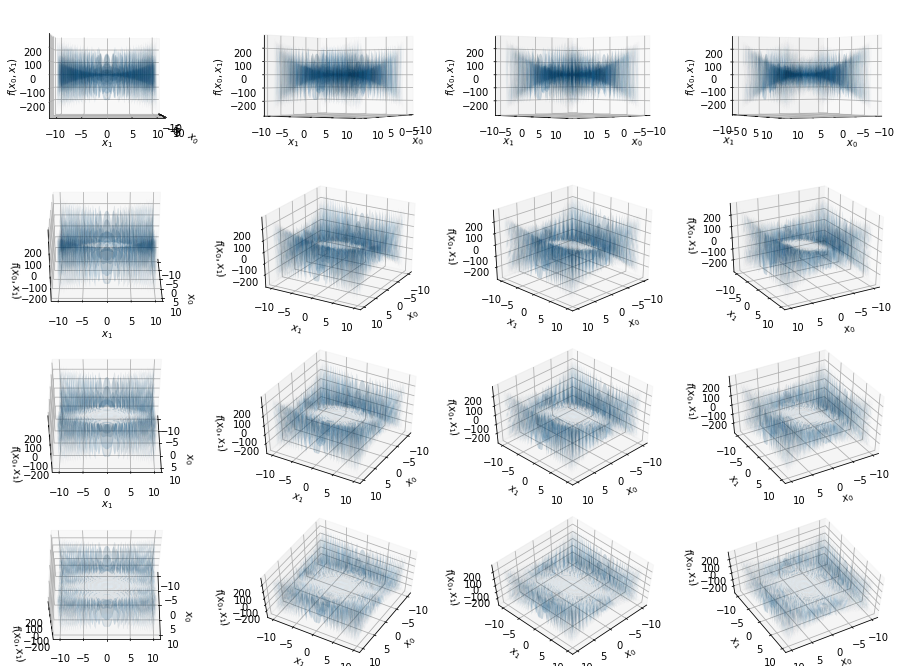

In [9]:
fig = plt.figure(figsize = (16, 12))

axes = [0 for i in range(16)]

for i in range(16):
  axes[i] = fig.add_subplot(4, 4, i + 1, projection = "3d")

view_angle = list(itertools.product([0, 30, 45, 60], [0, 30, 45, 60]))

for i in range(16):
  axes[i].plot_surface(x0_grid, x1_grid, value_6_3, alpha = 0.1)

  axes[i].set_xlabel("$x_0$")
  axes[i].set_ylabel("$x_1$")
  axes[i].set_zlabel("$f(x_0, x_1)$")

  axes[i].view_init(elev = view_angle[i][0], azim = view_angle[i][1])

plt.show()

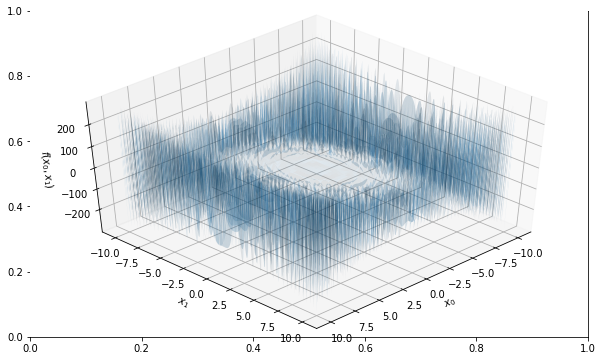

In [10]:
fig, ax = plt.subplots(figsize = (10, 6))
ax = fig.add_subplot(111, projection = '3d')

ax.plot_surface(x0_grid, x1_grid, value_6_3, alpha = 0.1)

ax.set_xlabel("$x_0$")
ax.set_ylabel("$x_1$")
ax.set_zlabel("$f(x_0, x_1)$")

ax.view_init(elev = view_angle[10][0], azim = view_angle[10][1])

plt.show()

# 6-4 : 숫자 맞추기 (발표)

random 모듈을 이용하여 1 이상 32 이하인 수 하나를 생성 후 6번 이하의 시도로 맞추는 프로그램 작성  
=> up down 숫자 맞추기 게임

- 로직 예시 : 정답이 14일 경우

첫 번째 숫자로 가운데인 16 제출 => down  
두 번째 숫자로 8 제출 => up  
세 번째 숫자로 12 제출 => up  
네 번째 숫자로 14 제출 => 정답



In [11]:
def target_random_number(min_value = 1, max_value = 32, seed = 20152410):

  # seed 지정 및 랜덤 정답 생성
  random.seed(seed)
  answer = random.randint(min_value, max_value)

  # 정답 제출 기회 6번
  for i in range(6):
    # 정답 제출 전략
    my_answer = math.floor((min_value + max_value) / 2)
    print("내가 제출한 정답은 {}입니다.".format(my_answer))
    
    # 정답이 더 클 경우
    if answer > my_answer:
      print("Up! 더 큰 숫자를 제출하세요.")
      min_value = my_answer

    # 정답이 더 작을 경우
    elif answer < my_answer:
      print("Down! 더 작은 숫자를 제출하세요.")
      max_value = my_answer
    
    # 정답을 맞췄을 경우
    else:
      print("정답을 맞췄습니다. 정답은 {}이었습니다.".format(answer))
      break

    print("\n")

  # 6번 반복했는데도 정답을 맞추지 못했을 경우
  if answer != my_answer:
    print("정답을 맞추지 못했습니다. 정답은 {}이었습니다.".format(answer))

In [12]:
target_random_number(min_value = 1, max_value = 32, seed = 20152410)

내가 제출한 정답은 16입니다.
Up! 더 큰 숫자를 제출하세요.


내가 제출한 정답은 24입니다.
Up! 더 큰 숫자를 제출하세요.


내가 제출한 정답은 28입니다.
Up! 더 큰 숫자를 제출하세요.


내가 제출한 정답은 30입니다.
Up! 더 큰 숫자를 제출하세요.


내가 제출한 정답은 31입니다.
정답을 맞췄습니다. 정답은 31이었습니다.


In [13]:
target_random_number(min_value = 1, max_value = 32, seed = 1234)

내가 제출한 정답은 16입니다.
Up! 더 큰 숫자를 제출하세요.


내가 제출한 정답은 24입니다.
Up! 더 큰 숫자를 제출하세요.


내가 제출한 정답은 28입니다.
Up! 더 큰 숫자를 제출하세요.


내가 제출한 정답은 30입니다.
Down! 더 작은 숫자를 제출하세요.


내가 제출한 정답은 29입니다.
정답을 맞췄습니다. 정답은 29이었습니다.


In [14]:
target_random_number(min_value = 1, max_value = 32, seed = 5678)

내가 제출한 정답은 16입니다.
Down! 더 작은 숫자를 제출하세요.


내가 제출한 정답은 8입니다.
Up! 더 큰 숫자를 제출하세요.


내가 제출한 정답은 12입니다.
Up! 더 큰 숫자를 제출하세요.


내가 제출한 정답은 14입니다.
Up! 더 큰 숫자를 제출하세요.


내가 제출한 정답은 15입니다.
정답을 맞췄습니다. 정답은 15이었습니다.


# 6-5 : 카이사르 암호

In [15]:
import string

In [16]:
def caesar_password(input_password, value):

  # 알파벳 : 숫자 형태의 딕셔너리 생성
  alphabet_dict = dict()
  for i in range(26):
    alphabet_dict[list(string.ascii_uppercase)[i]] = i

  # 룰에 필요한 자료 생성
  input_list = list(input_password)
  alphabet_items = list(alphabet_dict.items())
  output_number_list = []
  output_string_list = []

  # 반복을 통해서 정해진 규칙으로 암호 생성
  for i in range(len(input_list)):
    # 평행이동해서 숫자로 저장
    for j in range(26):
      if input_list[i] == alphabet_items[j][0]:
        output_number_list.append((alphabet_items[j][1] + value) % 26)
        break
    # 숫자로 저장한 것을 다시 알파벳으로 변환
    for j in range(26):
      if output_number_list[i] == alphabet_items[j][1]:
        output_string_list.append(alphabet_items[j][0])
        break

  return ''.join(output_string_list)

In [17]:
caesar_password(input_password = "ABY", value = 3)

'DEB'

In [18]:
caesar_password(input_password = "BAEHYUNGJUN", value = 10)

'LKORIEXQTEX'

# 6-6 : 콜라츠 추측

In [19]:
def collatz_conjecture(number):

  collatz_list = [number]

  while number != 1:
    
    # 짝수면 2로 나눠서 저장
    if number % 2 == 0:
      number = int(number / 2)
      collatz_list.append(number)
    
    # 홀수면 3 곱하고 1 더해서 저장
    else:
      number = 3 * number + 1
      collatz_list.append(number)

  return collatz_list

In [20]:
collatz_conjecture(49)

[49,
 148,
 74,
 37,
 112,
 56,
 28,
 14,
 7,
 22,
 11,
 34,
 17,
 52,
 26,
 13,
 40,
 20,
 10,
 5,
 16,
 8,
 4,
 2,
 1]

# 6-7 : 완전수

In [21]:
import time

In [22]:
def perfect_number(number):

  start = time.time()

  # 입력받은 수의 절반 + 1까지만 약수인지 검사해서 리스트에 추가
  divisor_list = [i for i in range(1, round(number / 2) + 1) if number % i == 0]
  divisor_sum = sum(divisor_list)
  
  if number == divisor_sum:
    print("{}은 완전수입니다.".format(number))
    result = True
  
  else:
    print("{}은 완전수가 아닙니다.".format(number))
    result = False

  end = time.time()
  cal_time = round(end - start)

  print("돌아가는데 걸린 시간 : {}분 {}초".format(cal_time // 60, cal_time % 60))

  return result

In [23]:
perfect_number(6)

6은 완전수입니다.
돌아가는데 걸린 시간 : 0분 0초


True

In [24]:
perfect_number(100)

100은 완전수가 아닙니다.
돌아가는데 걸린 시간 : 0분 0초


False

In [25]:
perfect_number(8128)

8128은 완전수입니다.
돌아가는데 걸린 시간 : 0분 0초


True

In [26]:
perfect_number(33550336)

33550336은 완전수입니다.
돌아가는데 걸린 시간 : 0분 1초


True

In [27]:
perfect_number(33551234)

33551234은 완전수가 아닙니다.
돌아가는데 걸린 시간 : 0분 1초


False

# 6-8 : Happy number

In [28]:
def search_happy_number(number):

  happy_number_list = []
  happy_number_procedure = {}

  for i in range(1, number + 1):
    
    number_list = []
    number_list.append(i)

    while True:
      temp = 0
      
      # 각 자리수별로 제곱해서 합산
      for j in range(len(str(number_list[-1]))):
        temp += int(str(number_list[-1])[j]) ** 2
      
      number_list.append(temp)
      
      # 결과가 한자리 수가 될 때까지 반복
      if len(str(temp)) == 1:
        happy_number_procedure[i] = number_list
        break
    
    # 한자리 수가 1이면 happy number로 판단
    if number_list[-1] == 1:
      happy_number_list.append(i)

  return happy_number_list, happy_number_procedure

In [29]:
happy_list, happy_procedure = search_happy_number(1000)
print(len(happy_list))
print(happy_list)

143
[1, 7, 10, 13, 19, 23, 28, 31, 32, 44, 49, 68, 70, 79, 82, 86, 91, 94, 97, 100, 103, 109, 129, 130, 133, 139, 167, 176, 188, 190, 192, 193, 203, 208, 219, 226, 230, 236, 239, 262, 263, 280, 291, 293, 301, 302, 310, 313, 319, 320, 326, 329, 331, 338, 356, 362, 365, 367, 368, 376, 379, 383, 386, 391, 392, 397, 404, 409, 440, 446, 464, 469, 478, 487, 490, 496, 536, 556, 563, 565, 566, 608, 617, 622, 623, 632, 635, 637, 638, 644, 649, 653, 655, 656, 665, 671, 673, 680, 683, 694, 700, 709, 716, 736, 739, 748, 761, 763, 784, 790, 793, 802, 806, 818, 820, 833, 836, 847, 860, 863, 874, 881, 888, 899, 901, 904, 907, 910, 912, 913, 921, 923, 931, 932, 937, 940, 946, 964, 970, 973, 989, 998, 1000]


In [30]:
for i in range(20):
  print(happy_procedure[happy_list[i]])

[1, 1]
[7, 49, 97, 130, 10, 1]
[10, 1]
[13, 10, 1]
[19, 82, 68, 100, 1]
[23, 13, 10, 1]
[28, 68, 100, 1]
[31, 10, 1]
[32, 13, 10, 1]
[44, 32, 13, 10, 1]
[49, 97, 130, 10, 1]
[68, 100, 1]
[70, 49, 97, 130, 10, 1]
[79, 130, 10, 1]
[82, 68, 100, 1]
[86, 100, 1]
[91, 82, 68, 100, 1]
[94, 97, 130, 10, 1]
[97, 130, 10, 1]
[100, 1]


In [31]:
for i in range(len(happy_list) - 20, len(happy_list)):
  print(happy_procedure[happy_list[i]])

[899, 226, 44, 32, 13, 10, 1]
[901, 82, 68, 100, 1]
[904, 97, 130, 10, 1]
[907, 130, 10, 1]
[910, 82, 68, 100, 1]
[912, 86, 100, 1]
[913, 91, 82, 68, 100, 1]
[921, 86, 100, 1]
[923, 94, 97, 130, 10, 1]
[931, 91, 82, 68, 100, 1]
[932, 94, 97, 130, 10, 1]
[937, 139, 91, 82, 68, 100, 1]
[940, 97, 130, 10, 1]
[946, 133, 19, 82, 68, 100, 1]
[964, 133, 19, 82, 68, 100, 1]
[970, 130, 10, 1]
[973, 139, 91, 82, 68, 100, 1]
[989, 226, 44, 32, 13, 10, 1]
[998, 226, 44, 32, 13, 10, 1]
[1000, 1]


# 6-9 : 거북이 게임

In [32]:
class Turtle:

  def __init__(self, x = 0, y = 0, direction = 0):
    
    self.x = x
    self.y = y
    self.direction = direction
    self.direction_dict = {0 : "동쪽", 1 : "서쪽", 2 : "남쪽", 3 : "북쪽"}

    self.speed = 1
    self.min_speed = 0
    self.max_speed = 3
    
    print("시작 위치는 ({}, {})입니다.".format(self.x, self.y))
    print("현재 {} 방향을 바라보고 있습니다.".format(self.direction_dict[self.direction]))
    print("현재 속도는 {}입니다.".format(self.speed))
    
  def printposition(self):

    print("현재 위치는 ({}, {})입니다.".format(self.x, self.y))
    print("현재 {} 방향을 바라보고 있습니다.".format(self.direction_dict[self.direction]))
    print("현재 속도는 {}입니다.".format(self.speed))
    
  def acceleration(self):

    self.speed += 1
    self.speed = self.speed if self.speed <= self.max_speed else self.max_speed
    print("속도가 올라갑니다. 현재 속도는 {}입니다.".format(self.speed))

  def brake(self):

    self.speed -= 1
    self.speed = self.speed if self.speed >= self.min_speed else self.min_speed
    print("속도가 내려갑니다. 현재 속도는 {}입니다.".format(self.speed))

  def change_direction(self, direction):

    assert direction in [0, 1, 2, 3], "There is no direction!"

    self.direction = direction
    print("{} 방향으로 변경되었습니다.".format(self.direction_dict[self.direction]))

  def go(self):

    if self.direction == 0:
      self.x = self.x + self.speed

    elif self.direction == 1:
      self.x = self.x - self.speed

    elif self.direction == 2:
      self.y = self.y - self.speed

    elif self.direction == 3:
      self.y = self.y + self.speed

    else:
      assert self.direction in [0, 1, 2, 3], "There is no direction!"

In [33]:
my_turtle = Turtle(x = 10, y = 10, direction = 1)

시작 위치는 (10, 10)입니다.
현재 서쪽 방향을 바라보고 있습니다.
현재 속도는 1입니다.


In [34]:
my_turtle.acceleration()

속도가 올라갑니다. 현재 속도는 2입니다.


In [35]:
my_turtle.acceleration()

속도가 올라갑니다. 현재 속도는 3입니다.


In [36]:
my_turtle.brake()

속도가 내려갑니다. 현재 속도는 2입니다.


In [37]:
my_turtle.printposition()

현재 위치는 (10, 10)입니다.
현재 서쪽 방향을 바라보고 있습니다.
현재 속도는 2입니다.


In [38]:
my_turtle.go()
my_turtle.printposition()

현재 위치는 (8, 10)입니다.
현재 서쪽 방향을 바라보고 있습니다.
현재 속도는 2입니다.


In [39]:
my_turtle.change_direction(direction = 3)

북쪽 방향으로 변경되었습니다.


In [40]:
my_turtle.go()
my_turtle.printposition()

현재 위치는 (8, 12)입니다.
현재 북쪽 방향을 바라보고 있습니다.
현재 속도는 2입니다.
